In [2]:
# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import FreqDist

# Preprocessing
import re
import string
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
import numpy as np
import os

# Modeling
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Wordcloud
from wordcloud import WordCloud, STOPWORDS 

#Pillow
from PIL import Image
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import sys
import pandas as pd

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/li

In [3]:
## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Define Metrics Function

In [4]:
### define function for plotting confusion matrix
def plot_confusion_matrix(y_test, y_hat_test):
 # '''
   # First Function for Plotting Confusion Matrix
    #Second Function to Calculate and displays the following: Train and Test Score, Classification Report, 
   # and Confusion Matrix.
    
       # Parameters:
            
          #  clf: classifier or instanciated model from run_model function
          #  y_train: y train from test, train, split
           # y_test: y test from test, train, split
          #  y_hat_test: y hat test from run_model fuction
            
   # '''
    # Print confusion matrix
  cnf_matrix = confusion_matrix(y_test, y_hat_test)
    # Create the basic matrix
  plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
    # Add appropriate axis scales
  class_names = set(y) # Get class labels to add to matrix
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=0)
  plt.yticks(tick_marks, class_names)
    # Add labels to each cell
  thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
  for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
           horizontalalignment='center',
          color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
   
def evaluate_model(clf, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Classifier: {clf}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {accuracy_score(y_test, y_hat_test)}')
    print(f'train accuracy: {accuracy_score(y_train, y_hat_train)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    return [classification_report(y_test, y_hat_test)]
    

In [5]:
### define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix 

### define function for plotting confusion matrix
def plot_confusion_matrix(y_test, y_hat_test):
  
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
   
def evaluate_model(clf, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Classifier: {clf}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {accuracy_score(y_test, y_hat_test)}')
    print(f'train accuracy: {accuracy_score(y_train, y_hat_train)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    return [accuracy_score(y_test, y_hat_test), classification_report(y_test, y_hat_test)]
    

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import sys
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/proclomation.csv', encoding= 'ISO-8859-1')


In [8]:
df.head()
df.info()

Tweet Id                                              tweet  label
0  1.280000e+18  RT @behindwoods : #TCS, #Infosys and #TechMahi...    0.0
1  1.280000e+18  #TCS, #Infosys and #TechMahindra come up with ...    0.0
2  1.280000e+18  RT @MarkSKrikorian : .@realDonaldTrump is the ...    1.0
3  1.280000e+18  RT @UpskillC : #Skills trump college degree.  ...    0.0
4  1.280000e+18  #Skills trump college degree.  "President Dona...    0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 0 to 9017
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tweet Id  9018 non-null   float64
 1   tweet     9018 non-null   object 
 2   label     9017 non-null   float64
dtypes: float64(2), object(1)
memory usage: 211.5+ KB


### Cleaning Data
To clean the tweets:

1- cleaning from punctiation through string.punctuation.

2- cleaning from stop words through removing English Stopwords.

3- Adding extended lists of removing more unwanted words such as http,amber,rt,RT.

4- keeping important sympols such as "#" and "@"

5- Applying the cleaning functions, so tweets will be tokinized as single words seperated by space meaning they are tokens.

6- Joining the tokinized tweets to String, that will make them list of strings

7- convet the cleaning list of tweet strings to dataframe.

8- Applying the Sentiment analyzing function on the dataframe of tweets to label the tweets.



In [9]:
import nltk
nltk.download("stopwords")

# Make a list of stopwords to remove
from nltk.corpus import stopwords
import string
# Get all the stop words in the English language
stopwords_list = stopwords.words('english')
stopwords_list
# add customized stopwords from my dataset
additional_words = ['“','”','...','``',"''",'’',"httpst",'amp',"theto","}",
                    "{","rt",".codgy3azxwOY","http:","https:","RT" ,"rt"]
   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
## Add punctuation to stopwords_list
stopwords_list+=string.punctuation
## extend the additional_words to stopwords_list
stopwords_list.extend(additional_words)
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
# keeping #,@
print(len(stopwords_list))
stopwords_list2 = []
for x in stopwords_list:
  if x not in ['#', '@']:
    stopwords_list2.append(x)
print(len(stopwords_list2))
stopwords_list2# stopwords_list2 is going to be my customized stopwords list i'm going to work with in my project

228
226


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# Create a pipeline to remove stop-words, punctuation, and perform tokenization
def message_cleaning(message):
  ''' pipeline function performs the follwoing:
  (1) remove punctiation,
  (2) remove stopwords'''


  Test_punc_removed=[char for char in message if char not in string.punctuation]
  Test_punc_removed_join=''.join(Test_punc_removed)
  Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split() if word.lower() not in stopwords_list2 ]
  return Test_punc_removed_join_clean

In [13]:
# let's test the newly added function
df_clean=df['tweet'].apply(message_cleaning)
df_clean.head()
print(df_clean[5]) # cleaning tweet in index 5

0    [behindwoods, TCS, Infosys, TechMahindra, come...
1    [TCS, Infosys, TechMahindra, come, solutions, ...
2    [MarkSKrikorian, realDonaldTrump, first, presi...
3    [UpskillC, Skills, trump, college, degree, Pre...
4    [Skills, trump, college, degree, President, Do...
Name: tweet, dtype: object

['natlawreview', 'Update', 'Implementation', 'June', '22', '2020', 'Presidential', 'Proclamation', 'Restricting', 'H', 'L', 'J', 'Entry', 'United', 'States', 'httpstcoKQTKObaVnW', 'MintzLaw', 'NonImmigrants', 'VisaBan', 'H1B']


In [14]:
df_cleaner = [" ".join(x) for x in df_clean]# return the tokinized tweet to list of strings i.e. sentence
df_cleaner

['behindwoods TCS Infosys TechMahindra come solutions tackle H1B VisaBan businesses Jobs httpstcoXrIgtJuHhR',
 'TCS Infosys TechMahindra come solutions tackle H1B VisaBan businesses Jobs httpstcoXrIgtJuHhR',
 'MarkSKrikorian realDonaldTrump first president take steps prevent Americans replaced H1B guestworkers httpstcogrwi2axGkB via CISorg',
 'UpskillC Skills trump college degree President Donald Trump signed executive order Friday directing federal government prioritize job applicantsÕ skills education degree httpstco4VDpyaCpiz college degree realDonaldTrump jobs economy unemployment H1B',
 'Skills trump college degree President Donald Trump signed executive order Friday directing federal government prioritize job applicantsÕ skills education degree httpstco4VDpyaCpiz college degree realDonaldTrump jobs economy unemployment H1B',
 'natlawreview Update Implementation June 22 2020 Presidential Proclamation Restricting H L J Entry United States httpstcoKQTKObaVnW MintzLaw NonImmigrants V

In [15]:
# convert the list of strings of tweets into dataframe
new_df = pd.DataFrame(df_cleaner, columns=["tweet"])
new_df.head()

tweet
0  behindwoods TCS Infosys TechMahindra come solu...
1  TCS Infosys TechMahindra come solutions tackle...
2  MarkSKrikorian realDonaldTrump first president...
3  UpskillC Skills trump college degree President...
4  Skills trump college degree President Donald T...

# Now we need to define a function to label the cleaned twits for this purpose, one third of the tweets were manually labeled.
List of negatives and positive words were created.

Then a compiler was created from regex library to create pattern of all postive and negative words.



In [16]:
# Define sentiment analaysis function to help with labeling tweets
def sentimentanlayze(tweet):
  '''  function to label tweets into positive or negative or neutral 
      through feeding it with list of positive word and list of 
      negative words and by using a regex compiler to create a pattern of 
      positive, negarive, and neutral words and piping the words to search 
      in all tweets '''
  
  
  # my positive list of words
  postive=[
"diversity",
"blacklivesmatter",
"blm",
"ernestMEdsel1",
"telugu",
"scam",
"stealing",
"visa reform",
"vbierschwale",
"denied",
"deny ",
#"american",
#"americans",
"greedy",
"support trump",
"#americafirst",
"outsourcing",
"college grads",
"david_j_bier",
"reduce h1b visas",
"american jobs",
"end h1bvisa",
"cheap",
"endh1",
"end h1b",
"denying",
"ends386",
"cocacha31775669",
"wcwoa",
"illegal",
"parasite",
"stops386",
"ivankatrump",
"expandtheban",
"thank you",
"frankdc17",
"@amworkco",
"amworkco",
"leader",
" overwork",
"#bigtech",
"pray",
"#nepotism",
"@wcwoa",
"fighting",
"foreigners",
"first president",
"@CommerceGov",
"screwing",
"do not like",
"replacements",
"displacing"
"merit",
"cursed "
"potus",
"add thousands",
"migration",
"extend",
"army",
"security",
"medical",
"charged",
"protect",
"positions",
"foreign",
"charged",
"fraud",
"liberation",
"@AmWorkCo",
"access",
"sideline",
"nebraska",
"2016 campaign",
"foreign-born",
"silicon valley"
]

# my negative list of words
  negative=[
"behdwoods",
"skilled",
"children",
"family",
"herretostay",
"moratorium",
"orange man",
"dissapointed",
"suicide",
"blocking" ,
"savej1",
"s386isfair",
"sanjeev93882222",
"cesifoti",
"alicegwells",
"attract",
"american dream",
"process easier",
"easier process",
"dwhiteheadsel",
"hurt",
"innovation",
"liberty_immigrn",
"sick"
 "moratorium",
 "wjraghu", 
 "wrong direction"
 "trumpÕs",
"fwdus",
"please",
"exceptional",
"training"
,"liberty_immigrn",
"wjraghu",
"hardworking",
 "PassS386",
 "Canada",
 "separated",
 "cancellation",
 "expert",
 "cloud",
 "haroun",
 "Professor",
 "delay",
"recovery "
"paediatriccardiology",
"nebraska",
"take action",
" abolish",
"savej1" ,
" au pair ",
" exchange visitor",
"remove",
" petition",
 "visa ban",
 "Senatordurbin"
 
]
  a = re.compile("("+"|" .join(negative)+")+", re.IGNORECASE) #|  means 'or ' in regular expression 
  if len(a.findall(tweet))>0:# word is included in the list
    return -1
  a = re.compile("("+"|" .join(postive)+")+", re.IGNORECASE) # create complier for the list of postive, to create pattern of all postive words 
  if len(a.findall(tweet))>0: # check in tweet with using the complier
    return 1

  return 0


In [17]:
# applying my function on not clean tweets and creating new labeled values

df['new_label']=[sentimentanlayze(x) for x in list(df["tweet"])] 
df.head(50)

Tweet Id  ... new_label
0   1.280000e+18  ...         0
1   1.280000e+18  ...         0
2   1.280000e+18  ...         1
3   1.280000e+18  ...         0
4   1.280000e+18  ...         0
5   1.280000e+18  ...         0
6   1.280000e+18  ...         0
7   1.280000e+18  ...         1
8   1.280000e+18  ...         0
9   1.280000e+18  ...         1
10  1.280000e+18  ...        -1
11  1.280000e+18  ...         1
12  1.280000e+18  ...         1
13  1.280000e+18  ...         1
14  1.280000e+18  ...         0
15  1.280000e+18  ...         1
16  1.280000e+18  ...         1
17  1.280000e+18  ...         0
18  1.280000e+18  ...         1
19  1.280000e+18  ...         1
20  1.280000e+18  ...         1
21  1.280000e+18  ...         1
22  1.280000e+18  ...         0
23  1.280000e+18  ...        -1
24  1.280000e+18  ...         1
25  1.280000e+18  ...         1
26  1.280000e+18  ...        -1
27  1.280000e+18  ...         1
28  1.280000e+18  ...         1
29  1.280000e+18  ...        -1
30  1.280000e+18  ...         0
31  1.280000e+18  ...        -1
32  1.280000e+18  ...        -1
33  1.280000e+18  ...         0
34  1.280000e+18  ...         1
35  1.280000e+18  ...         0
36  1.280000e+18  ...         1
37  1.280000e+18  ...         1
38  1.280000e+18  ...         1
39  1.280000e+18  ...        -1
40  1.280000e+18  ...         1
41  1.280000e+18  ...         1
42  1.280000e+18  ...         1
43  1.280000e+18  ...         1
44  1.280000e+18  ...        -1
45  1.280000e+18  ...        -1
46  1.280000e+18  ...         1
47  1.280000e+18  ...         1
48  1.280000e+18  ...         1
49  1.280000e+18  ...         1

[50 rows x 4 columns]

In [18]:
# rename columns
df.rename(columns = {'label':'manaual_label','new_label':'function_label' }, inplace = True) 
df.head(50)
df.info()
   

Tweet Id  ... function_label
0   1.280000e+18  ...              0
1   1.280000e+18  ...              0
2   1.280000e+18  ...              1
3   1.280000e+18  ...              0
4   1.280000e+18  ...              0
5   1.280000e+18  ...              0
6   1.280000e+18  ...              0
7   1.280000e+18  ...              1
8   1.280000e+18  ...              0
9   1.280000e+18  ...              1
10  1.280000e+18  ...             -1
11  1.280000e+18  ...              1
12  1.280000e+18  ...              1
13  1.280000e+18  ...              1
14  1.280000e+18  ...              0
15  1.280000e+18  ...              1
16  1.280000e+18  ...              1
17  1.280000e+18  ...              0
18  1.280000e+18  ...              1
19  1.280000e+18  ...              1
20  1.280000e+18  ...              1
21  1.280000e+18  ...              1
22  1.280000e+18  ...              0
23  1.280000e+18  ...             -1
24  1.280000e+18  ...              1
25  1.280000e+18  ...              1
26  1.280000e+18  ...             -1
27  1.280000e+18  ...              1
28  1.280000e+18  ...              1
29  1.280000e+18  ...             -1
30  1.280000e+18  ...              0
31  1.280000e+18  ...             -1
32  1.280000e+18  ...             -1
33  1.280000e+18  ...              0
34  1.280000e+18  ...              1
35  1.280000e+18  ...              0
36  1.280000e+18  ...              1
37  1.280000e+18  ...              1
38  1.280000e+18  ...              1
39  1.280000e+18  ...             -1
40  1.280000e+18  ...              1
41  1.280000e+18  ...              1
42  1.280000e+18  ...              1
43  1.280000e+18  ...              1
44  1.280000e+18  ...             -1
45  1.280000e+18  ...             -1
46  1.280000e+18  ...              1
47  1.280000e+18  ...              1
48  1.280000e+18  ...              1
49  1.280000e+18  ...              1

[50 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 0 to 9017
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tweet Id        9018 non-null   float64
 1   tweet           9018 non-null   object 
 2   manaual_label   9017 non-null   float64
 3   function_label  9018 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 281.9+ KB


# Explore Data
* Visualize tweet class distribution

* Generate Wordclouds for tweet classes

* Generate word frequency distribution plots for tweet classes

* Visualize Distribution of Tweet Length based on number of characters.

* Visualize Distribution of Tweet Token Length

In [19]:
# Converting labeles to object
df['sentiment'] = df['function_label'].astype('str')
df['sentiment'] = df['sentiment'].apply(lambda x: x.strip().replace("-1", "negative").replace("0", "neutral").replace("1","positive"))
df.head(50)

Tweet Id  ... sentiment
0   1.280000e+18  ...   neutral
1   1.280000e+18  ...   neutral
2   1.280000e+18  ...  positive
3   1.280000e+18  ...   neutral
4   1.280000e+18  ...   neutral
5   1.280000e+18  ...   neutral
6   1.280000e+18  ...   neutral
7   1.280000e+18  ...  positive
8   1.280000e+18  ...   neutral
9   1.280000e+18  ...  positive
10  1.280000e+18  ...  negative
11  1.280000e+18  ...  positive
12  1.280000e+18  ...  positive
13  1.280000e+18  ...  positive
14  1.280000e+18  ...   neutral
15  1.280000e+18  ...  positive
16  1.280000e+18  ...  positive
17  1.280000e+18  ...   neutral
18  1.280000e+18  ...  positive
19  1.280000e+18  ...  positive
20  1.280000e+18  ...  positive
21  1.280000e+18  ...  positive
22  1.280000e+18  ...   neutral
23  1.280000e+18  ...  negative
24  1.280000e+18  ...  positive
25  1.280000e+18  ...  positive
26  1.280000e+18  ...  negative
27  1.280000e+18  ...  positive
28  1.280000e+18  ...  positive
29  1.280000e+18  ...  negative
30  1.280000e+18  ...   neutral
31  1.280000e+18  ...  negative
32  1.280000e+18  ...  negative
33  1.280000e+18  ...   neutral
34  1.280000e+18  ...  positive
35  1.280000e+18  ...   neutral
36  1.280000e+18  ...  positive
37  1.280000e+18  ...  positive
38  1.280000e+18  ...  positive
39  1.280000e+18  ...  negative
40  1.280000e+18  ...  positive
41  1.280000e+18  ...  positive
42  1.280000e+18  ...  positive
43  1.280000e+18  ...  positive
44  1.280000e+18  ...  negative
45  1.280000e+18  ...  negative
46  1.280000e+18  ...  positive
47  1.280000e+18  ...  positive
48  1.280000e+18  ...  positive
49  1.280000e+18  ...  positive

[50 rows x 5 columns]

In [20]:
 # applying my function on the clean tweets and creating new labeled values

new_df["label"] = [sentimentanlayze(x) for x in list(new_df["tweet"])]
new_df.head(30)

tweet  label
0   behindwoods TCS Infosys TechMahindra come solu...      0
1   TCS Infosys TechMahindra come solutions tackle...      0
2   MarkSKrikorian realDonaldTrump first president...      1
3   UpskillC Skills trump college degree President...      0
4   Skills trump college degree President Donald T...      0
5   natlawreview Update Implementation June 22 202...      0
6   orfonline Suspension H1B Ñ India likelihood do...      0
7   AmWorkCo Thank realDonaldTrump taking first st...      1
8   Suspension H1B Ñ India likelihood downplay mov...      0
9   AmWorkCo hope pray realDonaldTrump enact solid...      1
10  wjraghu sick immigration moratorium thereÕs op...     -1
11  sylviak70097773 got rid H1b 3 million American...      1
12  MarkSKrikorian realDonaldTrump first president...      1
13  MarkSKrikorian realDonaldTrump first president...      1
14  IndiaToday Heres H1B visa suspension Trump gov...      0
15  MarkSKrikorian realDonaldTrump first president...      1
16  NeilMunroDC Twothirds young techworkers Silico...      1
17  Investors migrate families US 6 months investi...      0
18  NeilMunroDC majesticprimate Good progress damn...      0
19  STruthpills Nah Minimum 500K BigTech 200K fire...      1
20  got rid H1b 3 million Americans unemployed wou...      1
21  gracemarg3 realDonaldTrump ExpandTheBan h1b ne...      1
22  NeilMunroDC Pres Trumps big H1B visa worker re...      0
23  H1B visa ban1000s Indians might hv otherwise d...     -1
24  gracemarg3 expandtheban h1b realdonaltrump Cit...      1
25  ErnestMEdsel1 lordcurzon Whats special bring T...      1
26  wjraghu sick immigration moratorium thereÕs op...     -1
27  MarkSKrikorian realDonaldTrump first president...      1
28  SpeakSamuel H1B tech workers earn US tech work...      1
29  FWDus President TrumpÕs ban immigrant workers ...     -1

In [21]:
# create new labele  object column
new_df['sentiment'] = new_df['label'].astype('str')
new_df['sentiment'] = new_df['sentiment'].apply(lambda x: x.strip().replace("-1", "negative").replace("0", "neutral").replace("1","positive"))
new_df.head(50)



tweet  label sentiment
0   behindwoods TCS Infosys TechMahindra come solu...      0   neutral
1   TCS Infosys TechMahindra come solutions tackle...      0   neutral
2   MarkSKrikorian realDonaldTrump first president...      1  positive
3   UpskillC Skills trump college degree President...      0   neutral
4   Skills trump college degree President Donald T...      0   neutral
5   natlawreview Update Implementation June 22 202...      0   neutral
6   orfonline Suspension H1B Ñ India likelihood do...      0   neutral
7   AmWorkCo Thank realDonaldTrump taking first st...      1  positive
8   Suspension H1B Ñ India likelihood downplay mov...      0   neutral
9   AmWorkCo hope pray realDonaldTrump enact solid...      1  positive
10  wjraghu sick immigration moratorium thereÕs op...     -1  negative
11  sylviak70097773 got rid H1b 3 million American...      1  positive
12  MarkSKrikorian realDonaldTrump first president...      1  positive
13  MarkSKrikorian realDonaldTrump first president...      1  positive
14  IndiaToday Heres H1B visa suspension Trump gov...      0   neutral
15  MarkSKrikorian realDonaldTrump first president...      1  positive
16  NeilMunroDC Twothirds young techworkers Silico...      1  positive
17  Investors migrate families US 6 months investi...      0   neutral
18  NeilMunroDC majesticprimate Good progress damn...      0   neutral
19  STruthpills Nah Minimum 500K BigTech 200K fire...      1  positive
20  got rid H1b 3 million Americans unemployed wou...      1  positive
21  gracemarg3 realDonaldTrump ExpandTheBan h1b ne...      1  positive
22  NeilMunroDC Pres Trumps big H1B visa worker re...      0   neutral
23  H1B visa ban1000s Indians might hv otherwise d...     -1  negative
24  gracemarg3 expandtheban h1b realdonaltrump Cit...      1  positive
25  ErnestMEdsel1 lordcurzon Whats special bring T...      1  positive
26  wjraghu sick immigration moratorium thereÕs op...     -1  negative
27  MarkSKrikorian realDonaldTrump first president...      1  positive
28  SpeakSamuel H1B tech workers earn US tech work...      1  positive
29  FWDus President TrumpÕs ban immigrant workers ...     -1  negative
30  NeilMunroDC Pres Trumps big H1B visa worker re...      0   neutral
31  wjraghu sick immigration moratorium thereÕs op...     -1  negative
32  wjraghu sick immigration moratorium thereÕs op...     -1  negative
33  Investors migrate families US 4 months investi...      0   neutral
34  rebaliza4 httpstcosln4pitzou Microsoft HIRE IN...      1  positive
35  SpeakSamuel Heres detailed breakdown company s...      0   neutral
36  SpeakSamuel H1B tech workers earn US tech work...      1  positive
37  WCWOA 1 BLaw Federal Government agencies using...      1  positive
38  WCWOA incredibly important AmericanWorkers rea...      1  positive
39  sanjeev93882222 Dear SenatorDurbin please thin...     -1  negative
40  MarkSKrikorian realDonaldTrump first president...      1  positive
41  MarkSKrikorian realDonaldTrump first president...      1  positive
42  SenSasse SenatorFischer JeffFortenberry RepDon...      1  positive
43  WCWOA 1 BLaw Federal Government agencies using...      1  positive
44  libertyimmigrn Yes labor shortage US shortage ...     -1  negative
45  wjraghu sick immigration moratorium thereÕs op...     -1  negative
46  FrankDC17 fight Democrats vs Republicans White...      1  positive
47  SpeakSamuel H1B tech workers earn US tech work...      1  positive
48  WCWOA 1 BLaw Federal Government agencies using...      1  positive
49  WCWOA incredibly important AmericanWorkers rea...      1  positive

# Plotting Word Cloud

In [22]:
from wordcloud import WordCloud 
# convert all  the tweets into a list 
sentences=new_df['tweet'].tolist()
# join all the sentences i.e. combining all the tweets in one massive string
sentences_as_one_string= " ".join(sentences) # join all data

sentences_as_one_string

'behindwoods TCS Infosys TechMahindra come solutions tackle H1B VisaBan businesses Jobs httpstcoXrIgtJuHhR TCS Infosys TechMahindra come solutions tackle H1B VisaBan businesses Jobs httpstcoXrIgtJuHhR MarkSKrikorian realDonaldTrump first president take steps prevent Americans replaced H1B guestworkers httpstcogrwi2axGkB via CISorg UpskillC Skills trump college degree President Donald Trump signed executive order Friday directing federal government prioritize job applicantsÕ skills education degree httpstco4VDpyaCpiz college degree realDonaldTrump jobs economy unemployment H1B Skills trump college degree President Donald Trump signed executive order Friday directing federal government prioritize job applicantsÕ skills education degree httpstco4VDpyaCpiz college degree realDonaldTrump jobs economy unemployment H1B natlawreview Update Implementation June 22 2020 Presidential Proclamation Restricting H L J Entry United States httpstcoKQTKObaVnW MintzLaw NonImmigrants VisaBan H1B orfonline 

# visualize negative cloud

<Figure size 1440x1440 with 0 Axes>

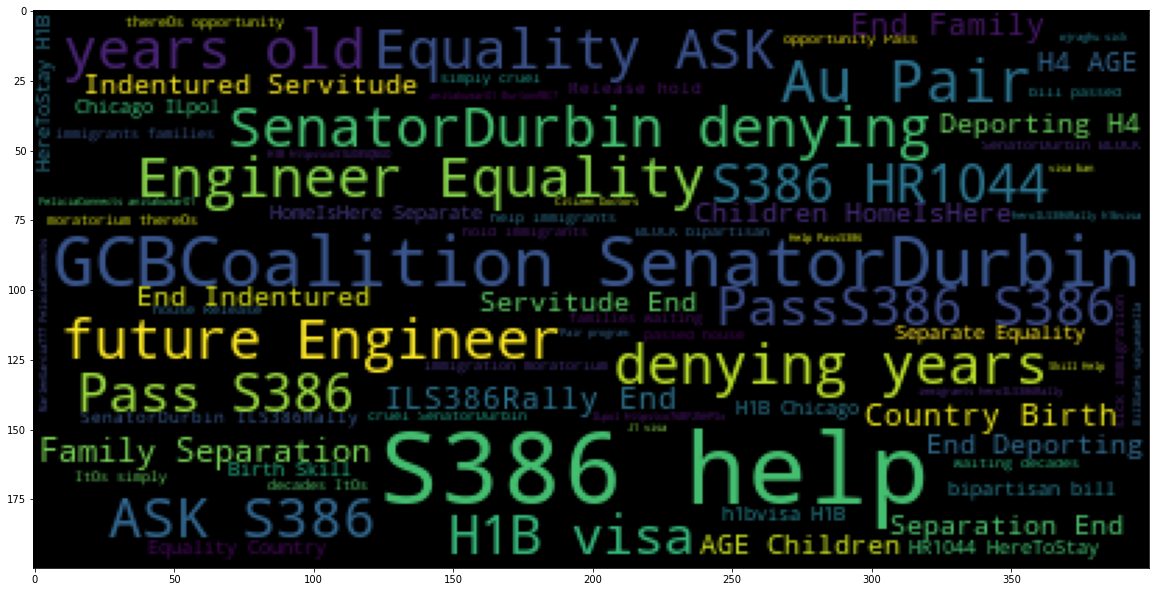

In [23]:
# visualize negative cloud, convert negative tweets to a list
negatives = new_df[new_df.sentiment == "negative"]
negative_list=negatives['tweet'].tolist()
# join the list of tweets into a mssive string
negative_sentences_as_one_string=" ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))



# visualize positive cloud

<Figure size 1440x1440 with 0 Axes>

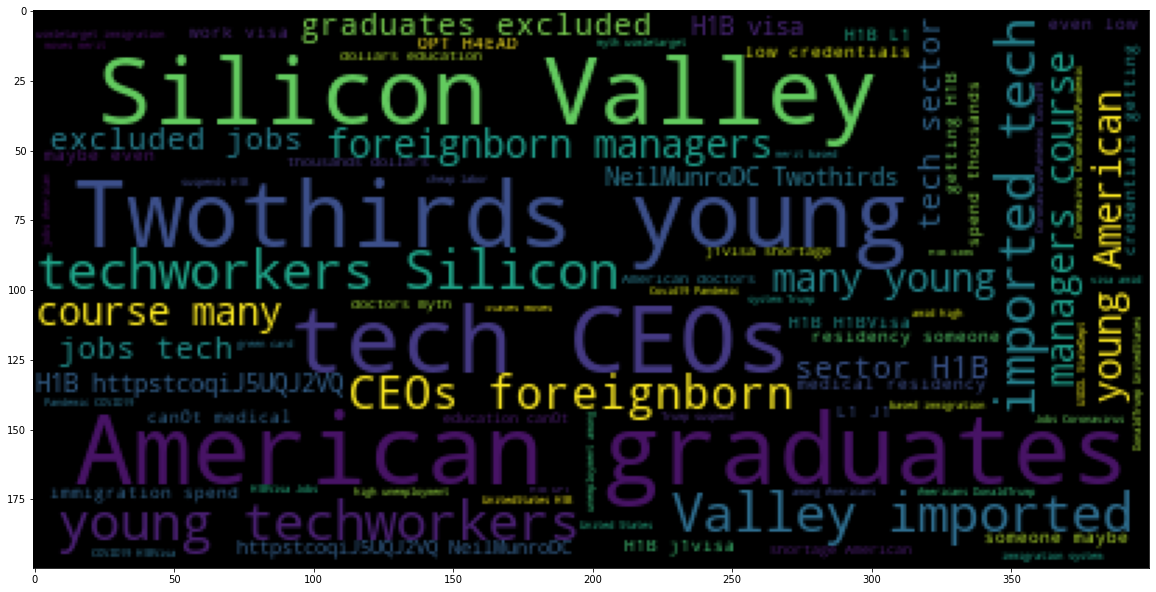

In [24]:
# visualize positive cloud, convert positive tweets to a list
positives = new_df [new_df.sentiment == 'positive']
positive_list=positives['tweet'].tolist()
# join the list of tweets into a mssive string
positive_sentences_as_one_string=" ".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))


# visualize neutral cloud

<Figure size 1440x1440 with 0 Axes>

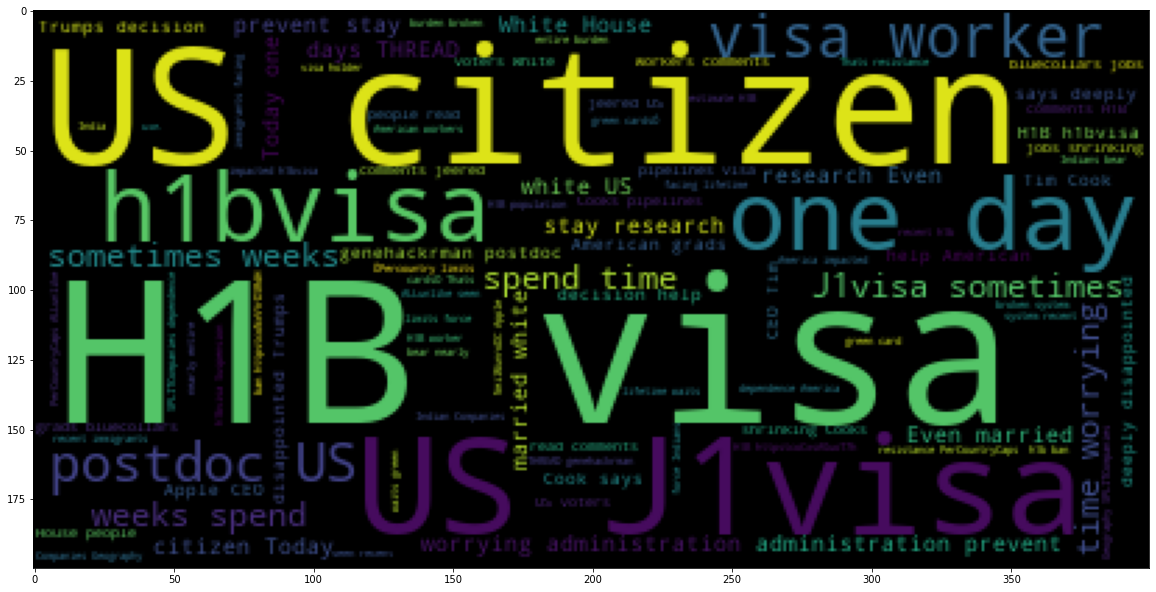

In [25]:
# visualize positive cloud, convert positive tweets to a list
neutrals = new_df [new_df.sentiment == 'neutral']
neutral_list=neutrals['tweet'].tolist()
# join the list of tweets into a mssive string
neutral_sentences_as_one_string=" ".join(neutral_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neutral_sentences_as_one_string))


### lenght of each tweet

In [26]:
# creating lenght column of each tweet based on number of characters
# to get the length of every tweet
new_df['length']=new_df['tweet'].apply(len)
new_df['length']

0       105
1        93
2       131
3       249
4       240
       ... 
9013    201
9014    201
9015    232
9016    232
9017    201
Name: length, Length: 9018, dtype: int64

*Token Length*

In [27]:
# create "token length" feature.

new_df['token_length'] = [len(x.split(" ")) for x in new_df.tweet]
new_df.head()
max(new_df.token_length)

tweet  ...  token_length
0  behindwoods TCS Infosys TechMahindra come solu...  ...            12
1  TCS Infosys TechMahindra come solutions tackle...  ...            11
2  MarkSKrikorian realDonaldTrump first president...  ...            14
3  UpskillC Skills trump college degree President...  ...            29
4  Skills trump college degree President Donald T...  ...            28

[5 rows x 5 columns]

55

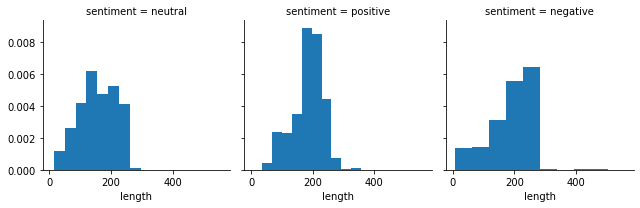

In [28]:
# showing the distribution of tweet length in each sentiment based on number of character
a = sns.FacetGrid(new_df,col='sentiment')
a.map(plt.hist,'length', density=True)

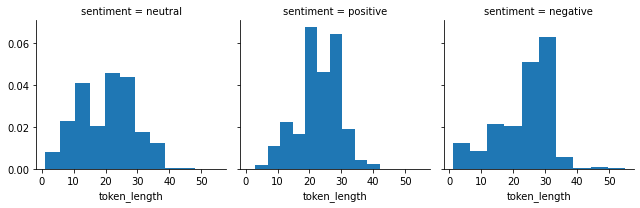

In [29]:
# visualizing the distribution of tokens on each sentiment
token_l = sns.FacetGrid(new_df,col='sentiment')
token_l.map(plt.hist,'token_length', density=True)

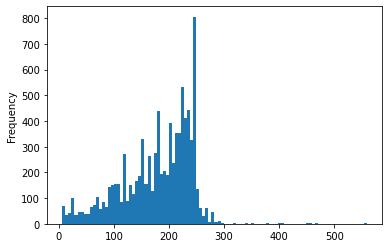

In [30]:
# histogram plt of length
new_df['length'].plot(bins=100,kind='hist')

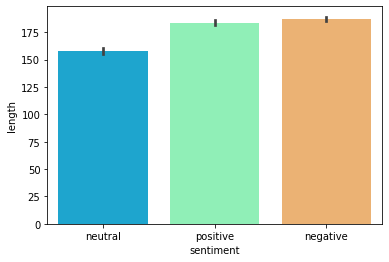

In [31]:
#barplotting the sentiment category to the length of tweet i.e. on number of characters
sns.barplot(x='sentiment',y='length',data=new_df,palette='rainbow')

In [32]:
# Identify target variables.

new_df['sentiment'].value_counts()

negative    4614
neutral     2228
positive    2176
Name: sentiment, dtype: int64

In [33]:
# Identify target variables.

new_df['sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [34]:
# check the number of neutral vs. negative  and positives tagged sentences
neutrals = new_df['label'][new_df.label == 0]
negatives = new_df['label'][new_df.label == -1]
positives =  new_df['label'][new_df.label == 1]

print('number of neutral tagged sentences is:  {}'.format(len(neutrals)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('number of positive tagged sentences is: {}'.format(len(positives)))
print('total length of the data is:            {}'.format(new_df.shape[0]))
new_df['sentiment'].value_counts()

number of neutral tagged sentences is:  2228
number of negative tagged sentences is: 4614
number of positive tagged sentences is: 2176
total length of the data is:            9018


negative    4614
neutral     2228
positive    2176
Name: sentiment, dtype: int64

In [35]:
# Top 10 frequent words
df_list = new_df
        
# get most common words in training dataset
import collections
all_words = []
for line in list(new_df['tweet']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())
    
collections.Counter(all_words).most_common(10)

[('h1b', 6662),
 ('us', 2597),
 ('h1bvisa', 2572),
 ('s386', 2117),
 ('visa', 1766),
 ('senatordurbin', 1653),
 ('help', 1598),
 ('american', 1584),
 ('jobs', 1562),
 ('end', 1375)]

Top 10 Words

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Top 25 most common words')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

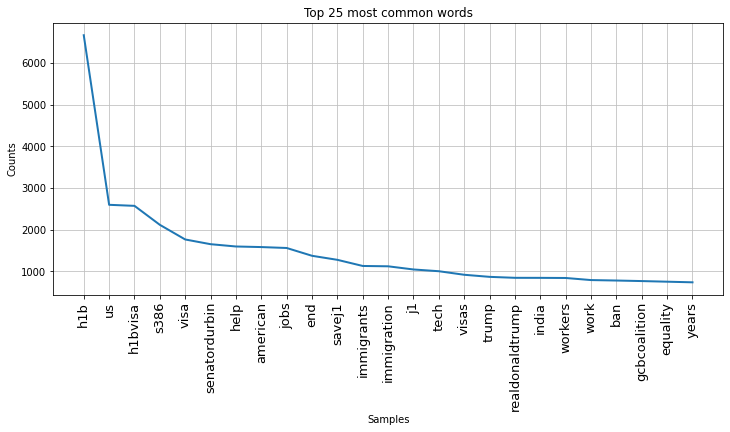

<Figure size 864x360 with 0 Axes>

Text(0, 0.5, 'Freq')

Text(0.5, 0, 'Word Rank')

Text(0.5, 1.0, 'log-log plot of words frequency')

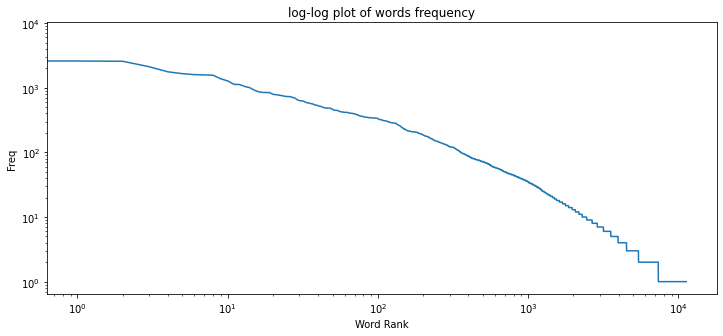

In [36]:
from collections import Counter
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
#plt.style.use('dark_background')
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

# Top 25 positive words

Text(0.5, 1.0, 'Top 25 Positive Words from Proclomation Tweets')

Text(0, 0.5, 'Word')

Text(0.5, 0, 'Number of Occurences')

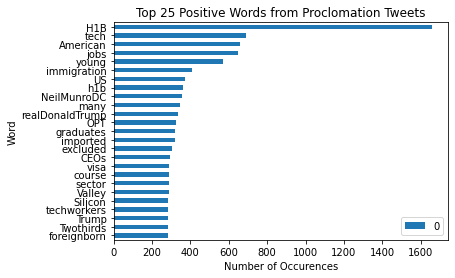

In [37]:
positives = new_df [new_df.sentiment == 'positive']
positive_list=positives['tweet'].tolist()

# Create a dictionary
word_counts = {}
for line in positive_list:
  # Split the tweets into words
    words = line.split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1 #Get previous entry, update by 1
# Update word counts
# Create Bar Graph


#With Pandas
counts = pd.DataFrame.from_dict(word_counts, orient='index')
counts = counts.sort_values(by=counts.columns[0], ascending=False)
cnt1 = counts.head(25).sort_values(by=counts.columns[0], ascending=True)
cnt1.plot(kind='barh')
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('dark_background')
plt.title('Top 25 Positive Words from Proclomation Tweets')
plt.ylabel('Word')
plt.xlabel('Number of Occurences')
# Include descriptive titles and labels


#  Top 25 negative words

Text(0.5, 1.0, 'Top 25 Negative Words from Proclomation Tweets')

Text(0, 0.5, 'Word')

Text(0.5, 0, 'Number of Occurences')

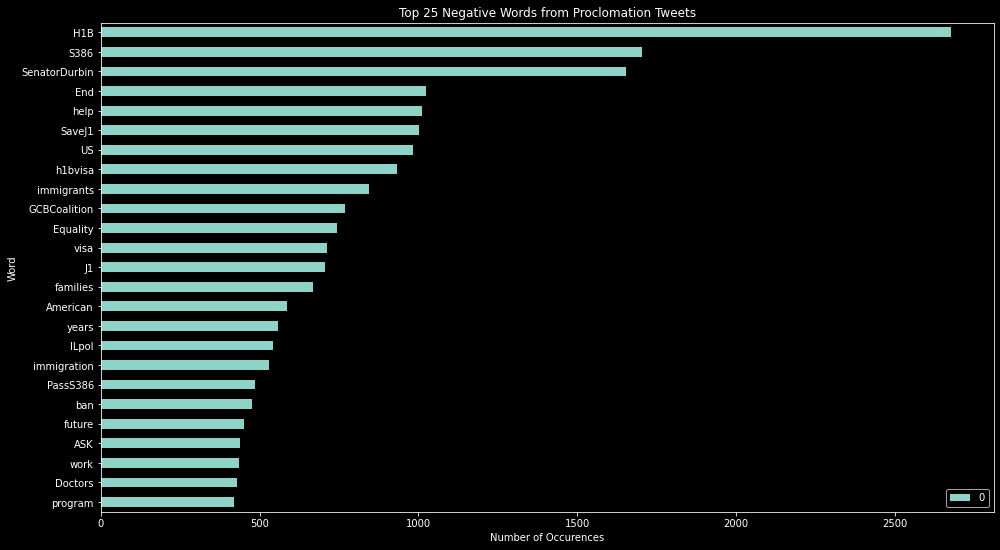

In [38]:
negatives = new_df [new_df.sentiment == 'negative']
negative_list=negatives['tweet'].tolist()

# Create a dictionary
word_counts = {}
for line in negative_list:
  # Split the tweets into words
    words = line.split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1 #Get previous entry, update by 1
# Update word counts
# Create Bar Graph


#With Pandas
counts = pd.DataFrame.from_dict(word_counts, orient='index')
counts = counts.sort_values(by=counts.columns[0], ascending=False)
cnt1 = counts.head(25).sort_values(by=counts.columns[0], ascending=True)
cnt1.plot(kind='barh')

plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('dark_background')
plt.title('Top 25 Negative Words from Proclomation Tweets')
plt.ylabel('Word')
plt.xlabel('Number of Occurences')
# Include descriptive titles and labels


In [39]:
# Display negative words 
cnt2 = counts[0].sort_values(ascending=False)
cnt2 = pd.DataFrame(cnt2)
cnt2.head(25)

0
H1B            2678
S386           1705
SenatorDurbin  1653
End            1023
help           1010
SaveJ1         1003
US              982
h1bvisa         934
immigrants      845
GCBCoalition    769
Equality        744
visa            712
J1              706
families        668
American        587
years           559
ILpol           541
immigration     530
PassS386        485
ban             476
future          450
ASK             437
work            434
Doctors         428
program         419

# Top 25 neutral words

Text(0.5, 1.0, 'Top 25 Neutral Words from Proclomation Tweets')

Text(0, 0.5, 'Word')

Text(0.5, 0, 'Number of Occurences')

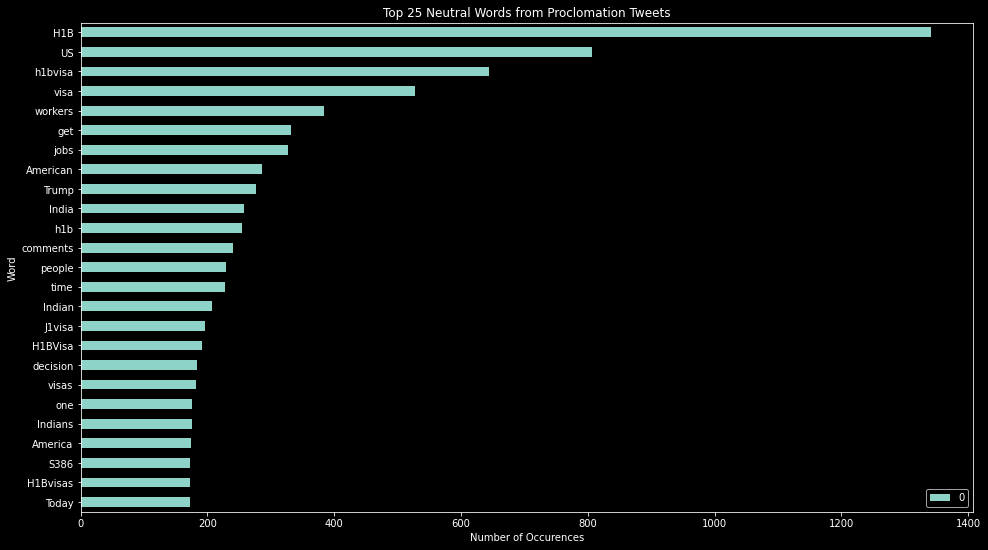

In [40]:
neutrals = new_df [new_df.sentiment == 'neutral']
neutral_list=neutrals['tweet'].tolist()

# Create a dictionary
word_counts = {}
for line in neutral_list:
  # Split the tweets into words
    words = line.split()
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1 #Get previous entry, update by 1
# Update word counts
# Create Bar Graph


#With Pandas
counts = pd.DataFrame.from_dict(word_counts, orient='index')
counts = counts.sort_values(by=counts.columns[0], ascending=False)
cnt1 = counts.head(25).sort_values(by=counts.columns[0], ascending=True)
cnt1.plot(kind='barh')

plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('dark_background')
plt.title('Top 25 Neutral Words from Proclomation Tweets')
plt.ylabel('Word')
plt.xlabel('Number of Occurences')
# Include descriptive titles and labels


# Distribution of number of tweets in each Class

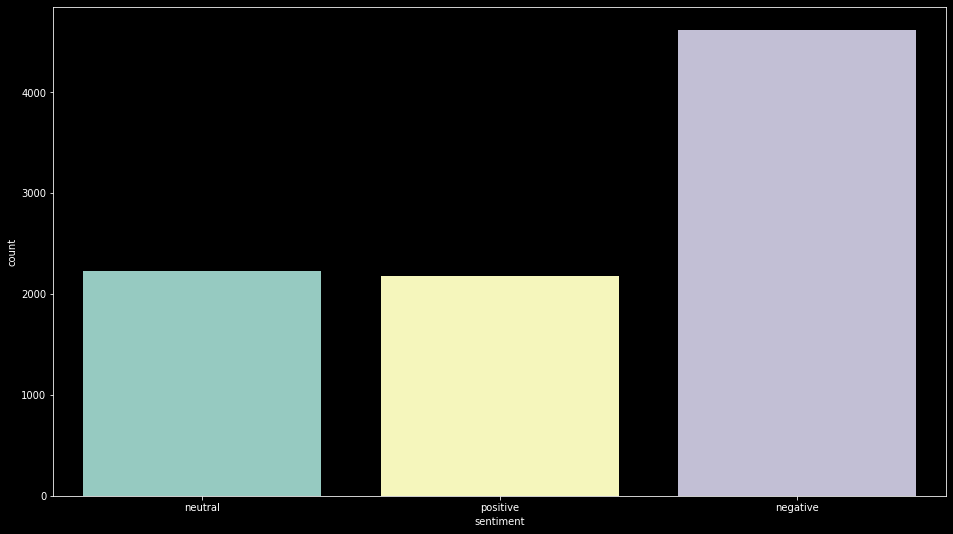

In [41]:
#How many tweets are present in each class in the labeled Proclomation tweets?
# Quick histogram of tweet classes

sns.countplot(x='sentiment', data=new_df);

# Sentiment pieplot

([<matplotlib.patches.Wedge at 0x7ff48c621630>,
 [Text(-0.7706037725107667, 0.7849648564057977, 'neutrals'),
  Text(0.019925511610251554, -1.0998195188243705, 'negatives'),
  Text(0.7562584783586451, 0.7987947883597307, 'positives')],
 [Text(-0.42032933046041815, 0.42816264894861694, '24.7%'),
  Text(0.010868460878319029, -0.5999015557223838, '51.2%'),
  Text(0.4125046245592609, 0.4357062481962167, '24.1%')])

(-1.1027189858094435,
 1.1062598036283315,
 -1.1023839257394863,
 1.1001135202733088)

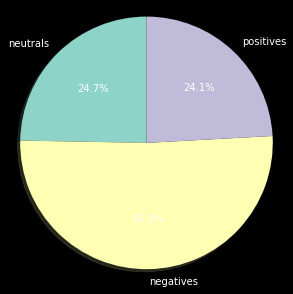

In [42]:
# Sentiment pieplot
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'neutrals', 'negatives','positives'

# Sizes for each slide
sizes = [len(neutrals), len(negatives),len(positives)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

# Modeling Data

# Train/Test/Split

Before modeling, I still need to perform more preprocessing on my data.I will need to encode my target and tokenize my features as following:

In [43]:
le = LabelEncoder()

le.fit(df['sentiment'])

df['target'] = le.transform(df['sentiment'])
df.head(50)

LabelEncoder()

Tweet Id  ... target
0   1.280000e+18  ...      1
1   1.280000e+18  ...      1
2   1.280000e+18  ...      2
3   1.280000e+18  ...      1
4   1.280000e+18  ...      1
5   1.280000e+18  ...      1
6   1.280000e+18  ...      1
7   1.280000e+18  ...      2
8   1.280000e+18  ...      1
9   1.280000e+18  ...      2
10  1.280000e+18  ...      0
11  1.280000e+18  ...      2
12  1.280000e+18  ...      2
13  1.280000e+18  ...      2
14  1.280000e+18  ...      1
15  1.280000e+18  ...      2
16  1.280000e+18  ...      2
17  1.280000e+18  ...      1
18  1.280000e+18  ...      2
19  1.280000e+18  ...      2
20  1.280000e+18  ...      2
21  1.280000e+18  ...      2
22  1.280000e+18  ...      1
23  1.280000e+18  ...      0
24  1.280000e+18  ...      2
25  1.280000e+18  ...      2
26  1.280000e+18  ...      0
27  1.280000e+18  ...      2
28  1.280000e+18  ...      2
29  1.280000e+18  ...      0
30  1.280000e+18  ...      1
31  1.280000e+18  ...      0
32  1.280000e+18  ...      0
33  1.280000e+18  ...      1
34  1.280000e+18  ...      2
35  1.280000e+18  ...      1
36  1.280000e+18  ...      2
37  1.280000e+18  ...      2
38  1.280000e+18  ...      2
39  1.280000e+18  ...      0
40  1.280000e+18  ...      2
41  1.280000e+18  ...      2
42  1.280000e+18  ...      2
43  1.280000e+18  ...      2
44  1.280000e+18  ...      0
45  1.280000e+18  ...      0
46  1.280000e+18  ...      2
47  1.280000e+18  ...      2
48  1.280000e+18  ...      2
49  1.280000e+18  ...      2

[50 rows x 6 columns]



Define X and y


In [44]:
from sklearn.model_selection import train_test_split

X = df['tweet']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.40,
                                                    random_state=123,shuffle=True)

In [45]:
y_test.value_counts()

0    1843
1     900
2     865
Name: target, dtype: int64

In [46]:
y_train.value_counts()


0    2764
1    1348
2    1298
Name: target, dtype: int64

#  LinearSVC

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from nltk import TweetTokenizer
from sklearn.metrics import precision_score, recall_score, f1_score

In [48]:
# Initialize the TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=False)

In [49]:
## Make a list of stopwords to remove
from nltk.corpus import stopwords
import string
# Get all the stop words in the English language
stopwords_list = stopwords.words('english')

additional_words = ['“','”','...','``',"''",'’',"httpst",'amp',"theto","}",
                    "{","rt",".codgy3azxwOY"]
   

In [50]:
## Add punctuation to stopwords_list
stopwords_list+=string.punctuation
## Add additional_words to stopwords_list
stopwords_list.extend(additional_words)
print(len(stopwords_list))
stopwords_list2 = []
for x in stopwords_list:
  if x not in ['#', '@']:
    stopwords_list2.append(x)
len(stopwords_list2)

224


222

In [51]:
linear_svc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                                 tokenizer=tokenizer.tokenize)),
                     ('clf', LinearSVC(class_weight='balanced'))])

linear_svc.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ff48c673be0>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight='balanced', dual=True,
         

In [52]:
# prediction
y_hat_train=linear_svc.predict(X_train)
y_hat_test = linear_svc.predict(X_test)



Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ff48c673be0>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight='balanced', dual=Tru

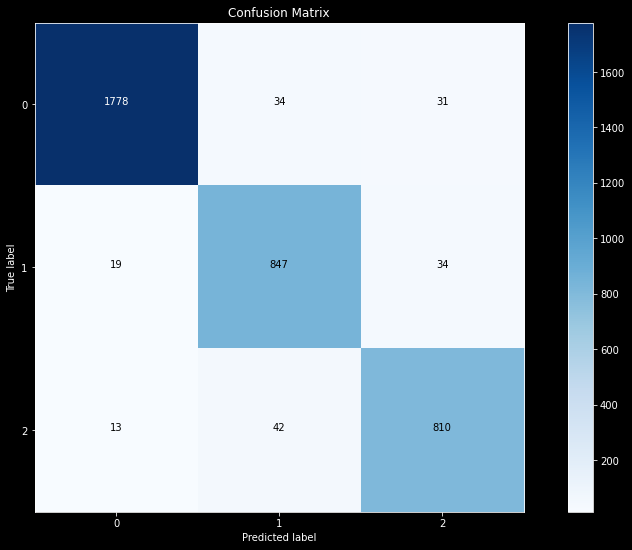

test accuracy: 0.9520509977827051
train accuracy: 0.9964879852125693
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1778   34   31  1843
1            19  847   34   900
2            13   42  810   865
All        1810  923  875  3608

test report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1843
           1       0.92      0.94      0.93       900
           2       0.93      0.94      0.93       865

    accuracy                           0.95      3608
   macro avg       0.94      0.95      0.94      3608
weighted avg       0.95      0.95      0.95      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.95

In [53]:
from sklearn import metrics

results=evaluate_model(linear_svc, y_train, y_test, y_hat_train, y_hat_test)
svm_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
svm_test_acc


In [54]:
my_results = []
my_res = {
    "model": "LinearSVC",
    "type": "Linear Classifier",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model               type   Test Accuracy
0  LinearSVC  Linear Classifier        0.952051

# MulitinomialNB

In [55]:
from sklearn.naive_bayes import MultinomialNB
text_mnb = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                               tokenizer=tokenizer.tokenize)),
                     ('clf', MultinomialNB())])

# Feed the training data through the pipeline
text_mnb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
               

In [56]:
#Predictions
y_hat_train=text_mnb.predict(X_train)
y_hat_test = text_mnb.predict(X_test)



# Metrics

Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
   

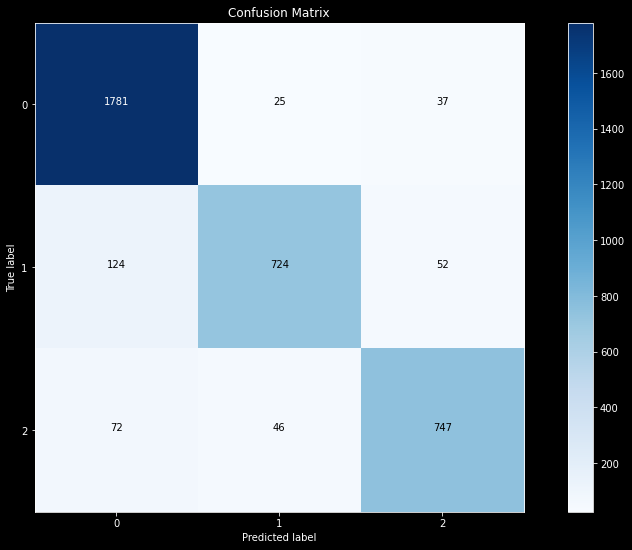

test accuracy: 0.9013303769401331
train accuracy: 0.9574861367837338
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1781   25   37  1843
1           124  724   52   900
2            72   46  747   865
All        1977  795  836  3608

test report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1843
           1       0.91      0.80      0.85       900
           2       0.89      0.86      0.88       865

    accuracy                           0.90      3608
   macro avg       0.90      0.88      0.89      3608
weighted avg       0.90      0.90      0.90      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.9

In [57]:
results=evaluate_model(text_mnb, y_train, y_test, y_hat_train, y_hat_test)
mnb_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
mnb_test_acc

In [58]:
my_res = {
    "model": "MulitinomialNB",
    "type": "naive Bayes Classifier",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model                    type   Test Accuracy
0       LinearSVC       Linear Classifier        0.952051
1  MulitinomialNB  naive Bayes Classifier        0.901330

# SGDClassifier

In [59]:
from sklearn.linear_model import SGDClassifier


In [60]:
text_sgdc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                                tokenizer=tokenizer.tokenize)),
                     ('clf', SGDClassifier())])


text_sgdc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                           

In [61]:

#Predictions
y_hat_train=text_sgdc.predict(X_train)
y_hat_test = text_sgdc.predict(X_test)



# Metrics

Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
               

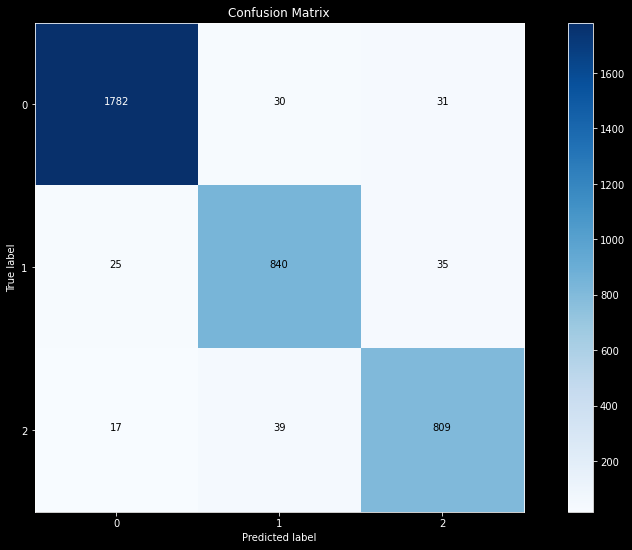

test accuracy: 0.9509423503325942
train accuracy: 0.9953789279112755
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1782   30   31  1843
1            25  840   35   900
2            17   39  809   865
All        1824  909  875  3608

test report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1843
           1       0.92      0.93      0.93       900
           2       0.92      0.94      0.93       865

    accuracy                           0.95      3608
   macro avg       0.94      0.95      0.94      3608
weighted avg       0.95      0.95      0.95      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.95

In [62]:
results=evaluate_model(text_sgdc, y_train, y_test, y_hat_train, y_hat_test)
sgd_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
sgd_test_acc

In [63]:
# Collecting Results
my_res = {
    "model": "SGD",
    "type": "Stochastic Gradient Descent (SGD)",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model                               type   Test Accuracy
0       LinearSVC                  Linear Classifier        0.952051
1  MulitinomialNB             naive Bayes Classifier        0.901330
2             SGD  Stochastic Gradient Descent (SGD)        0.950942

 
 
 
# LogisticRegression 


In [64]:
from sklearn.linear_model import LogisticRegression
text_lr = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                              tokenizer=tokenizer.tokenize)),
                     ('clf', LogisticRegression())])

text_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ff48c673be0>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
     

In [65]:
#Predictions
y_hat_train=text_lr.predict(X_train)
y_hat_test = text_lr.predict(X_test)



# Metrics

Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ff48c673be0>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=

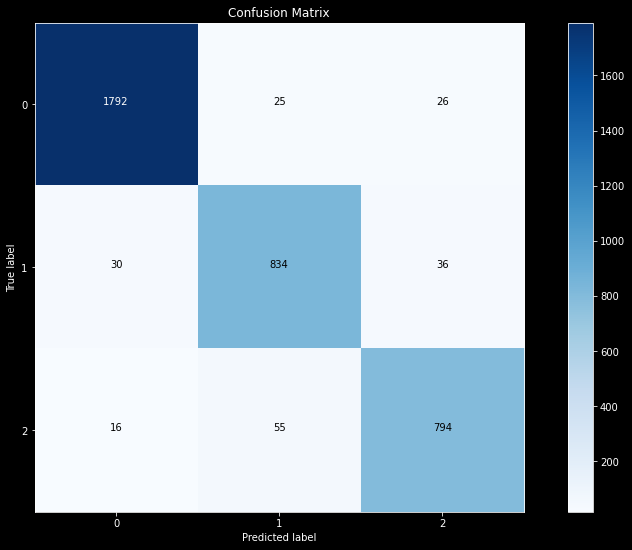

test accuracy: 0.9478935698447893
train accuracy: 0.9874306839186692
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1792   25   26  1843
1            30  834   36   900
2            16   55  794   865
All        1838  914  856  3608

test report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1843
           1       0.91      0.93      0.92       900
           2       0.93      0.92      0.92       865

    accuracy                           0.95      3608
   macro avg       0.94      0.94      0.94      3608
weighted avg       0.95      0.95      0.95      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


[0.9478935698447893,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97      1843\n           1       0.91      0.93      0.92       900\n           2       0.93      0.92      0.92       865\n\n    accuracy                           0.95      3608\n   macro avg       0.94      0.94      0.94      3608\nweighted avg       0.95      0.95      0.95      3608\n']

In [66]:
evaluate_model(text_lr, y_train, y_test, y_hat_train, y_hat_test)
lgr_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

In [67]:
my_res = {
    "model": "LogisticRegression",
    "type": "Classifier",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model                               type   Test Accuracy
0           LinearSVC                  Linear Classifier        0.952051
1      MulitinomialNB             naive Bayes Classifier        0.901330
2                 SGD  Stochastic Gradient Descent (SGD)        0.950942
3  LogisticRegression                         Classifier        0.950942

#  RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
text_rfc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                               tokenizer=tokenizer.tokenize)),
                     ('clf', RandomForestClassifier(class_weight='balanced'))])

text_rfc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_lea

In [69]:
#Predictions
y_hat_train=text_rfc.predict(X_train)
y_hat_test = text_rfc.predict(X_test)



# Metrics

Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                   

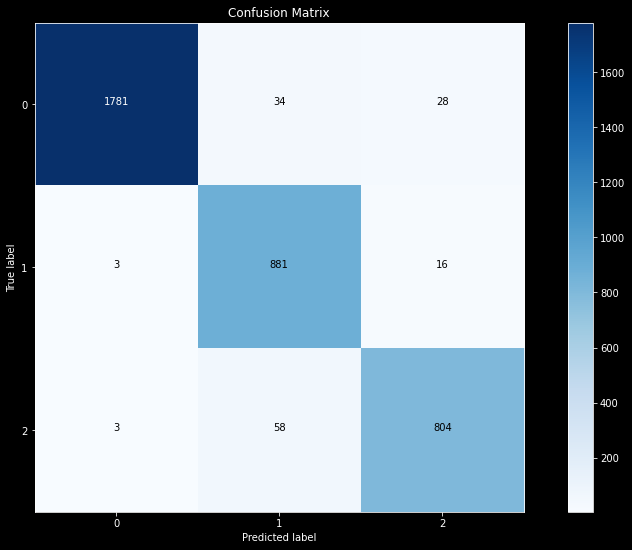

test accuracy: 0.9606430155210643
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1781   34   28  1843
1             3  881   16   900
2             3   58  804   865
All        1787  973  848  3608

test report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1843
           1       0.91      0.98      0.94       900
           2       0.95      0.93      0.94       865

    accuracy                           0.96      3608
   macro avg       0.95      0.96      0.95      3608
weighted avg       0.96      0.96      0.96      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.96

In [70]:
results=evaluate_model(text_rfc, y_train, y_test, y_hat_train, y_hat_test)
rf_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
rf_test_acc

In [71]:
my_res = {
    "model": "RandomForestClassifier",
    "type": "Class=WeightBalance",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model                               type   Test Accuracy
0               LinearSVC                  Linear Classifier        0.952051
1          MulitinomialNB             naive Bayes Classifier        0.901330
2                     SGD  Stochastic Gradient Descent (SGD)        0.950942
3      LogisticRegression                         Classifier        0.950942
4  RandomForestClassifier                Class=WeightBalance        0.960643

All my models showed great accuracy, however there are kind of discrepancy between train and test, this discrepancy shows kind of little overfitting and can be solved by adjusting the weight balance in all classes and hypertuning the parameters. I will play first with the weight balance. Later, I will work in optimizing the parameters.
Since Random Forest showed the best result,I will further work in balancing the classes with smote techniques.



# Balancing with Smote

In [72]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import  SMOTE
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                            tokenizer=tokenizer.tokenize)

rfc = RandomForestClassifier(class_weight='balanced')

# RFC - SMOTE

In [73]:
SMOTE_pipeline = make_pipeline(tfidf, SMOTE(random_state=123),rfc)
SMOTE_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourse...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf

In [74]:
#Predictions
y_hat_train=SMOTE_pipeline.predict(X_train)
y_hat_test = SMOTE_pipeline.predict(X_test)



# Metrics

Classifier: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourse...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                    

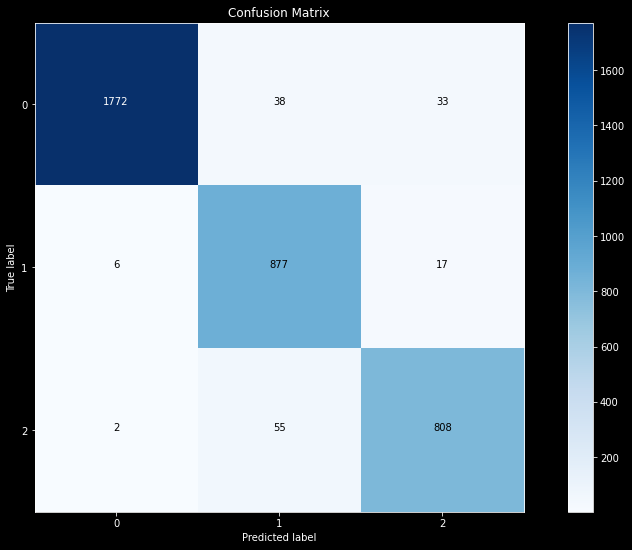

test accuracy: 0.9581485587583148
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1772   38   33  1843
1             6  877   17   900
2             2   55  808   865
All        1780  970  858  3608

test report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1843
           1       0.90      0.97      0.94       900
           2       0.94      0.93      0.94       865

    accuracy                           0.96      3608
   macro avg       0.95      0.96      0.95      3608
weighted avg       0.96      0.96      0.96      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.96

In [75]:
results=evaluate_model(SMOTE_pipeline, y_train, y_test, y_hat_train, y_hat_test)
smote_rf_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
smote_rf_test_acc 

In [76]:
my_res = {
    "model": "RFC - SMOTE ",
    "type": "Randomforest Balanced by Smote",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model                               type   Test Accuracy
0               LinearSVC                  Linear Classifier        0.952051
1          MulitinomialNB             naive Bayes Classifier        0.901330
2                     SGD  Stochastic Gradient Descent (SGD)        0.950942
3      LogisticRegression                         Classifier        0.950942
4  RandomForestClassifier                Class=WeightBalance        0.960643
5            RFC - SMOTE      Randomforest Balanced by Smote        0.958149

### Smote Didn't add any improvement. Now, I will try hypertuning randomforest parameters and I will keep working with smote on my train dataset

# Hyper Tunning

With tring smote there is a neglible improvment not worth it to consider.Now I will try to hypertune the parameters and look for the best parameter and best estimator, so I can plug it again in my model and check if the metrics will improve.

In [77]:
params = {'randomforestclassifier__criterion':['gini','entropy'],
             'randomforestclassifier__max_depth':[None, 5, 3, 10],
             'randomforestclassifier__min_samples_leaf': [1,2,3],
         'randomforestclassifier__max_features':['auto','sqrt',3,5,10,30,70]}

In [78]:
SMOTE_pipeline = make_pipeline(tfidf, SMOTE(random_state=123),rfc)


In [79]:
grid = GridSearchCV(SMOTE_pipeline, cv=5, n_jobs=-1, param_grid=params ,
                    scoring='recall_macro')

In [80]:
grid.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                               

In [81]:
grid.score(X_test, y_test)


0.9606406251942086


### Research best estimator from grid

In [82]:
grid.best_params_


{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 1}

In [83]:
# Research best estimator from grid
best_pipe = grid.best_estimator_


In [84]:
best_pipe

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourse...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='sqrt',
                                        max_leaf

In [85]:
best_pipe.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourse...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='sqrt',
                                        max_leaf

In [86]:


#Predictions
y_hat_train=best_pipe.predict(X_train)
y_hat_test = best_pipe.predict(X_test)




Classifier: Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourse...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='sqrt',
                                    

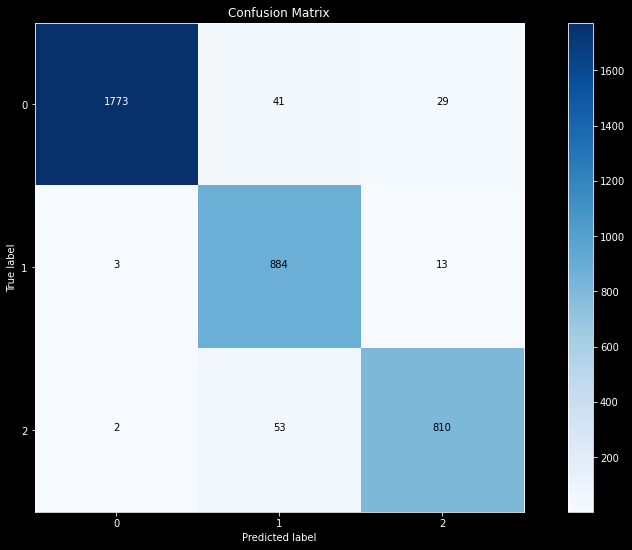

test accuracy: 0.960920177383592
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1    2   All
Actual                         
0          1773   41   29  1843
1             3  884   13   900
2             2   53  810   865
All        1778  978  852  3608

test report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1843
           1       0.90      0.98      0.94       900
           2       0.95      0.94      0.94       865

    accuracy                           0.96      3608
   macro avg       0.95      0.96      0.95      3608
weighted avg       0.96      0.96      0.96      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.96

In [87]:
results=evaluate_model(best_pipe, y_train, y_test, y_hat_train, y_hat_test)
rf_gridsearch_test_acc = round(accuracy_score(y_test,y_hat_test), 2)
rf_gridsearch_test_acc


In [88]:
my_res = {
    "model": "RFC -GridSearch ",
    "type": "Randomforest Hypertuned by best estimator",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model  ...  Test Accuracy
0               LinearSVC  ...       0.952051
1          MulitinomialNB  ...       0.901330
2                     SGD  ...       0.950942
3      LogisticRegression  ...       0.950942
4  RandomForestClassifier  ...       0.960643
5            RFC - SMOTE   ...       0.958149
6        RFC -GridSearch   ...       0.960920

[7 rows x 3 columns]

### Hypertunning also didn't add any improvement. So I will check now feature extraction of random forest classifier and I will try other models that are well-known of its good accuracy results such as AdaBoost,XGBoost and neural network.

# Extract Feature Importances

<Figure size 720x864 with 0 Axes>

Text(0.5, 1.0, 'Feature importance of Random Forest model')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 139 missing from current font.
  font.set_text(s, 0.0,

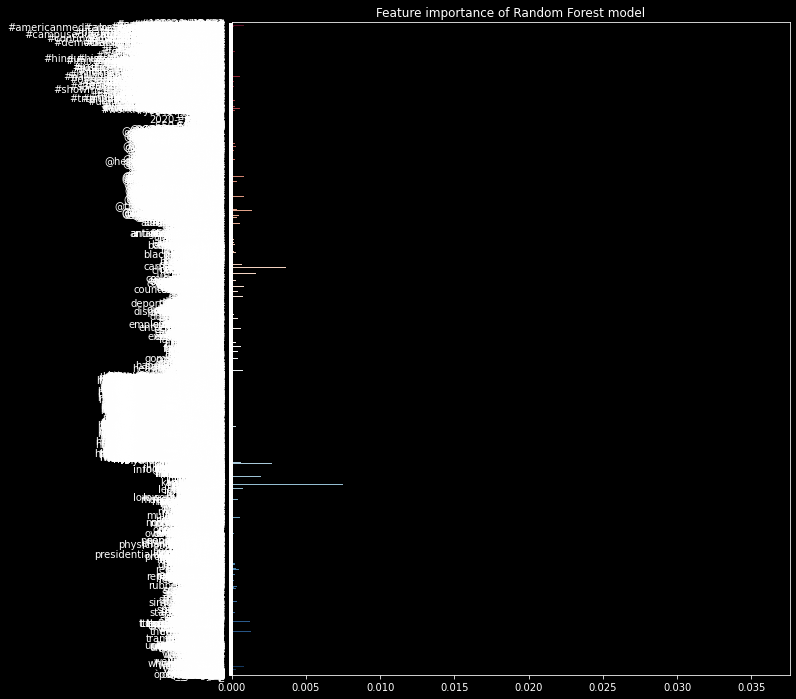

In [89]:
treedf = pd.Series(data=best_pipe.named_steps['randomforestclassifier'].feature_importances_,
                      index=best_pipe.named_steps['tfidfvectorizer'].get_feature_names())

plt.figure(figsize=(10,12))
plt.title("Feature importance of Random Forest model")
ax = sns.barplot(y=treedf.index, x=treedf.values, palette="RdBu")


In [90]:
top_words = treedf.sort_values(ascending=False).head(10).index
    
 #     '''
#     "For loop" cycling through top 10 feature importances words and placing them in a 
#     dictionary with the "word" as the the key and "value counts" as the value per class.
    
#     Returns DataFrame with "word" as index and normalized value counts for each class
#     where the "word" is present.
#  the "word" is present.
 #   '''

word_dict={}
for word in top_words:
    
    word_df=new_df.copy()

    word_df["contains"] = word_df["tweet"].str.contains(word)

    sentiment = ["negative", "neutral", "positive"]

    emo_dict = {}
    for emo in sentiment:
        emo_df = word_df.groupby("sentiment").get_group(emo)
        emo_df["contains"].value_counts(normalize=True)
        emo_dict[emo] = emo_df["contains"].value_counts(normalize=True)

    word_dict[word]= pd.Series(emo_dict, name=word)


False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.883832
True     0.116168
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.817096
True     0.182904
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.985046
True     0.014954
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.744026
True     0.255974
Name: contains, dtype: float64

False    0.971175
True     0.028825
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.965106
True     0.034894
Name: contains, dtype: float64

False    1.0
Name: contains, dtype: float64

False    0.888787
True     0.111213
Name: contains, dtype: float64

In [91]:
pd.DataFrame(word_dict).T


negative  ...                                           positive
#savej1               False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
#h1b                  False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
#h1bvisa              False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
immigration     False    0.883832
True     0.116168
Name: cont...  ...  False    0.817096
True     0.182904
Name: cont...
@senatordurbin        False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
#immigration          False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
foreign         False    0.985046
True     0.014954
Name: cont...  ...  False    0.744026
True     0.255974
Name: cont...
please          False    0.971175
True     0.028825
Name: cont...  ...        False    1.0
Name: contains, dtype: float64
#s386                 False    1.0
Name: contains, dtype: float64  ...        False    1.0
Name: contains, dtype: float64
cheap           False    0.965106
True     0.034894
Name: cont...  ...  False    0.888787
True     0.111213
Name: cont...

[10 rows x 3 columns]

#AdaBoost Classifier

In [92]:
# Instantiate classifier, fit, and predict on test data
from sklearn.ensemble import  AdaBoostClassifier


text_adc=Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                               tokenizer=tokenizer.tokenize)),
                     ('clf', AdaBoostClassifier())])

text_adc.fit(X_train, y_train)




/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.token

In [93]:
#Predictions
y_hat_train=text_adc.predict(X_train)
y_hat_test = text_adc.predict(X_test)


Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bound method TweetTokenizer.tokenize of

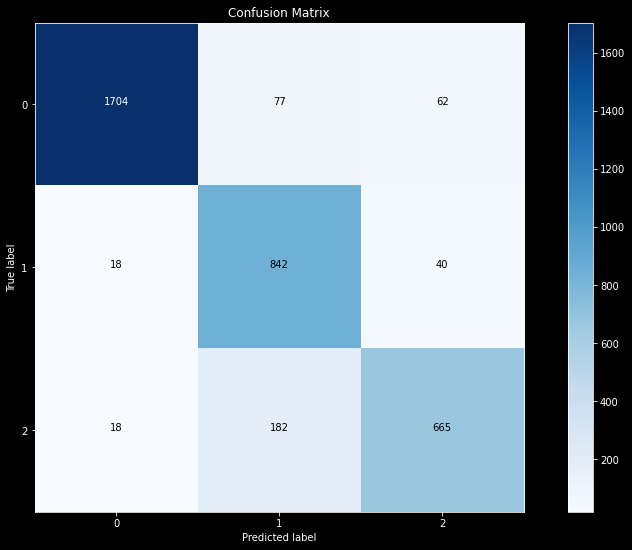

test accuracy: 0.8899667405764967
train accuracy: 0.8970425138632163
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1    2   All
Actual                          
0          1704    77   62  1843
1            18   842   40   900
2            18   182  665   865
All        1740  1101  767  3608

test report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1843
           1       0.76      0.94      0.84       900
           2       0.87      0.77      0.81       865

    accuracy                           0.89      3608
   macro avg       0.87      0.88      0.87      3608
weighted avg       0.90      0.89      0.89      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.89

In [94]:
# Evaluate classifier
results=evaluate_model(text_adc, y_train, y_test, y_hat_train, y_hat_test)

ada_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
ada_test_acc

In [95]:
my_res = {
    "model": "text_adc ",
    "type": "AdaBoost classifie ",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model  ...  Test Accuracy
0               LinearSVC  ...       0.952051
1          MulitinomialNB  ...       0.901330
2                     SGD  ...       0.950942
3      LogisticRegression  ...       0.950942
4  RandomForestClassifier  ...       0.960643
5            RFC - SMOTE   ...       0.958149
6        RFC -GridSearch   ...       0.960920
7               text_adc   ...       0.889967

[8 rows x 3 columns]

# XGBoost Classifier

In [96]:
# Instantiate classifier, fit, and predict on test data


text_xgb = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words=stopwords_list2,
                                              tokenizer=tokenizer.tokenize)),
                     ('clf', XGBClassifier())])

text_xgb.fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3azxwoy', 'codgy'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child

In [97]:
#Predictions
y_hat_train=text_xgb.predict(X_train)
y_hat_test = text_xgb.predict(X_test)


Classifier: Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                            

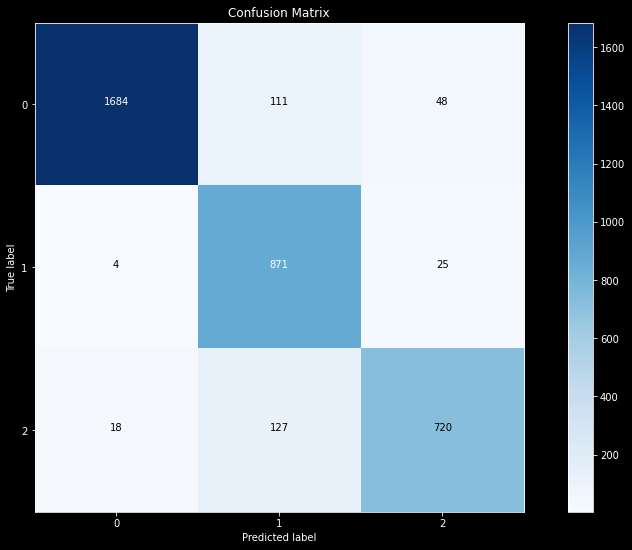

test accuracy: 0.9077050997782705
train accuracy: 0.933271719038817
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1    2   All
Actual                          
0          1684   111   48  1843
1             4   871   25   900
2            18   127  720   865
All        1706  1109  793  3608

test report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1843
           1       0.79      0.97      0.87       900
           2       0.91      0.83      0.87       865

    accuracy                           0.91      3608
   macro avg       0.89      0.90      0.89      3608
weighted avg       0.92      0.91      0.91      3608

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


0.91

In [98]:
results=evaluate_model(text_xgb, y_train, y_test, y_hat_train, y_hat_test)
xgb_test_acc = round(accuracy_score(y_test, y_hat_test), 2)
xgb_test_acc

In [99]:
my_res = {
    "model": "text_xgb ",
    "type": "XGBoost Classifier ",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model  ...  Test Accuracy
0               LinearSVC  ...       0.952051
1          MulitinomialNB  ...       0.901330
2                     SGD  ...       0.950942
3      LogisticRegression  ...       0.950942
4  RandomForestClassifier  ...       0.960643
5            RFC - SMOTE   ...       0.958149
6        RFC -GridSearch   ...       0.960920
7               text_adc   ...       0.889967
8               text_xgb   ...       0.907705

[9 rows x 3 columns]

#Neural Network Classifier

In [100]:
# Define simple neural network model

vectorizer = TfidfVectorizer(max_features=100)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model = Sequential()
model.add(Dense(100, input_dim=100, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

# Fit to training data
model.fit(X_train, y_train, epochs=5, batch_size=100, 
          validation_data=(X_test, y_test))

Train on 5410 samples, validate on 3608 samples
Epoch 1/5
5410/5410 [==============================] - 2s 347us/step - loss: 0.9650 - accuracy: 0.5329 - val_loss: 0.8433 - val_accuracy: 0.5837
Epoch 2/5
5410/5410 [==============================] - 0s 35us/step - loss: 0.7488 - accuracy: 0.6595 - val_loss: 0.6684 - val_accuracy: 0.7350
Epoch 3/5
5410/5410 [==============================] - 0s 34us/step - loss: 0.6055 - accuracy: 0.7523 - val_loss: 0.5720 - val_accuracy: 0.7627
Epoch 4/5
5410/5410 [==============================] - 0s 34us/step - loss: 0.5283 - accuracy: 0.7824 - val_loss: 0.5216 - val_accuracy: 0.7808
Epoch 5/5
5410/5410 [==============================] - 0s 35us/step - loss: 0.4799 - accuracy: 0.8074 - val_loss: 0.4836 - val_accuracy: 0.7949


In [101]:
#Predictions
y_hat_train=model.predict(X_train)
y_hat_test = model.predict(X_test)


In [102]:
def evaluate_clf(y_true, y_pred):
    """Return confusion matrix, classification report, and accuracy score
    for a classifier.
    
    Parameters
    ----------
    y_true : array-like
        Target class labels
    y_pred : array-like
        Predicted class labels
        
    Returns
    ----------
    Confusion matrix, classification report, accuracy score
    """
    
    test_acc = round(accuracy_score(y_true, y_pred), 2)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('---'*20)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('---'*20)
    print('Test Accuracy:')
    print(test_acc)
    

In [103]:
# Make predictions on test data

nn_test_pred = model.predict_classes(X_test)

# Evaluate classifier performance

evaluate_clf(y_test, nn_test_pred)
nn_test_acc = round(accuracy_score(y_test, nn_test_pred), 2)

Confusion Matrix:
[[1586  149  108]
 [ 138  687   75]
 [ 129  141  595]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1843
           1       0.70      0.76      0.73       900
           2       0.76      0.69      0.72       865

    accuracy                           0.79      3608
   macro avg       0.77      0.77      0.77      3608
weighted avg       0.80      0.79      0.79      3608

------------------------------------------------------------
Test Accuracy:
0.79


In [104]:
my_res = {
    "model": "model ",
    "type": "neural network ",
    " Test Accuracy": results[0],
    
}
my_results.append(my_res)

my_res_df = pd.DataFrame(my_results)
my_res_df

model  ...  Test Accuracy
0               LinearSVC  ...       0.952051
1          MulitinomialNB  ...       0.901330
2                     SGD  ...       0.950942
3      LogisticRegression  ...       0.950942
4  RandomForestClassifier  ...       0.960643
5            RFC - SMOTE   ...       0.958149
6        RFC -GridSearch   ...       0.960920
7               text_adc   ...       0.889967
8               text_xgb   ...       0.907705
9                  model   ...       0.907705

[10 rows x 3 columns]

#  Model Part One Summary:(Based on TFIDF Vectorizer)

In [105]:
# Create classifier summary table

models = ['Linear SVC', 'Multinomial Naive Bayes','SGD', 'LogisticRegression', 'RandomForestClassifier','Smote Random Forest','Random Forest Gridsearch','AdaBoost', 'XGBoost', 'Neural Network']

tfidf_model_accs = [svm_test_acc, mnb_test_acc,sgd_test_acc,lgr_test_acc,rf_test_acc, smote_rf_test_acc,rf_gridsearch_test_acc, ada_test_acc, xgb_test_acc, nn_test_acc]

tfidf_summary = pd.DataFrame([models, tfidf_model_accs]).T

tfidf_summary.columns = ['Classifier', 'Tfidf Accuracy']

tfidf_summary

Classifier Tfidf Accuracy
0                Linear SVC           0.95
1   Multinomial Naive Bayes            0.9
2                       SGD           0.95
3        LogisticRegression           0.95
4    RandomForestClassifier           0.96
5       Smote Random Forest           0.96
6  Random Forest Gridsearch           0.96
7                  AdaBoost           0.89
8                   XGBoost           0.91
9            Neural Network           0.79

# Generating Word Embeddings

Now, I will try to use NLP Embeddings Techniques which will generate word embeddings by :

* Train a Word2Vec model and transform words into vectors

* Obtain most similar words by using methods associated with word vector

In [106]:
from gensim.models import Word2Vec
from nltk import word_tokenize

# Create a Word2Vec model and pass in the following arguments:
- The dataset we'll be training on, data
- The size of the word vectors to create, size=100
- The window size, window=5
- The minimum number of times a word needs to appear in order to be counted in the model, min_count=1
- The number of threads to use during training, workers=4

In [107]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [108]:
data = new_df['tweet'].map(word_tokenize)
#Inspect the first 5 items in data to see how everything looks.

data[:5]


0    [behindwoods, TCS, Infosys, TechMahindra, come...
1    [TCS, Infosys, TechMahindra, come, solutions, ...
2    [MarkSKrikorian, realDonaldTrump, first, presi...
3    [UpskillC, Skills, trump, college, degree, Pre...
4    [Skills, trump, college, degree, President, Do...
Name: tweet, dtype: object

In [109]:
model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)
model


# Call the .train() method on my model and pass in the following parameters:
- The dataset we'll be training on, data
- The total_examples of sentences in the dataset, which you can find in model.corpus_count
- The number of epochs we want to train for, which we'll set to 10

In [110]:
model.train(data, total_examples=model.corpus_count, epochs=10)


(1859647, 2019410)

now we have a fully trained model! The word vectors themselves are stored in the Word2VecKeyedVectors instance, which is stored in the .wv attribute. To simplify this, restore this object inside of the variable wv to save yourself some keystrokes down the line.

In [111]:
wv = model.wv


# Examining my Word Vectors

Now that we have a trained Word2Vec model, I will explore the relationships between some of the words in the corpus!

One cool thing you can use Word2Vec for is to get the most similar words to a given word. I can do this by passing in the word to wv.most_similar()

In [112]:
wv.most_similar('president')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('steps', 0.7712516188621521),
 ('weakest', 0.7691521644592285),
 ('history', 0.7421213388442993),
 ('AsherWilliams', 0.7320029735565186),
 ('JaredampIvanka', 0.7294150590896606),
 ('fast', 0.7206475138664246),
 ('httpstcoINPiBtkI9I', 0.7082931995391846),
 ('SecPompeo', 0.7006272077560425),
 ('Citizens', 0.6981514692306519),
 ('MarkSKrikorian', 0.6807952523231506)]

Interesting! All of the most similar words are something we are seeing attached to it such as history, steps, things are mostly related to the concept of great acheivemts 

We can also get the least similar vectors to a given word by passing in the word to the .most_similar() method's negative parameter.

In [113]:
# To get the vector of given word by passing in the word as if we were passing in a key to a dictionary.

wv['immigration']

array([-2.315693  , -0.00536209,  0.7589509 ,  1.7809718 ,  1.6221243 ,
       -0.06794511, -0.16731259,  0.6156233 ,  0.82714856, -0.8779473 ,
        1.7883918 ,  2.7038176 ,  0.63757104, -1.327789  , -1.0166765 ,
        3.4134767 ,  2.0416174 , -0.7974535 ,  1.3823502 , -1.1303126 ,
       -0.17868356, -0.99171764,  0.7800246 ,  0.9338545 , -0.5224876 ,
       -0.4929636 ,  2.3075006 ,  0.41645554, -0.3671139 , -0.4954264 ,
       -0.84975165,  0.6261516 ,  0.3620193 ,  2.4787064 , -1.6430299 ,
       -0.8927702 , -1.0271273 ,  0.39596295, -2.0864954 ,  1.3902556 ,
        0.15020464,  2.1987731 , -1.0305359 , -0.59715647, -0.8379213 ,
        0.39589518,  1.2048597 , -0.8042572 ,  0.13386643, -1.0194317 ,
       -1.6441988 , -0.5045042 , -1.46697   , -1.2019621 , -0.9725475 ,
        0.73995423,  0.49214372,  0.90803874,  1.693545  , -0.20622706,
       -2.6273413 , -1.0984037 ,  3.2706144 , -0.12802437, -0.0068311 ,
        1.0665303 , -0.9519282 , -0.86371005,  0.17238854,  0.74

In [114]:
# To get all of the word vectors from the object at once, We can find these inside of wv.vectors
wv.vectors


array([[-0.43488637, -0.14837708,  0.24791643, ..., -0.8906236 ,
         0.02319747, -1.7317678 ],
       [ 0.22848618, -0.69293463,  1.3166409 , ..., -0.32736868,
        -0.44803864, -0.24721502],
       [ 1.7686391 , -0.563132  ,  0.6933246 , ..., -0.55265725,
         1.4344053 , -1.7884842 ],
       ...,
       [-0.0048209 , -0.03371189,  0.02753766, ..., -0.0313297 ,
         0.01413664,  0.01301201],
       [-0.07240488,  0.08717527,  0.04812637, ..., -0.01759017,
        -0.11478858, -0.00749113],
       [ 0.06697351, -0.06429601, -0.03706058, ..., -0.01077356,
         0.03495375, -0.01069911]], dtype=float32)

In [115]:
#  translating the word analogies into an addition/subtraction
wv.most_similar(positive=['save', 'immigration'], negative=['pair'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Durbin', 0.6212679743766785),
 ('moratorium', 0.5908834338188171),
 ('Chicago', 0.5869697332382202),
 ('jobseekers', 0.5867906808853149),
 ('sucking', 0.5809147357940674),
 ('K', 0.5783730745315552),
 ('fasttrack', 0.5752953290939331),
 ('httpstco76BF2NHPSx', 0.574241042137146),
 ('Dick', 0.5689470767974854),
 ('talents', 0.5686790943145752)]

# Classification with Word Embeddings

# Transfer learning 

Now, I will use transfer learning techniquea which work on loading in the weights from an open-sourced model that has already been trained for a very long time on a massive amount of data. 

Specifically, I'll work with the GloVe model from the Stanford NLP Group. There's not really any benefit from training the model ourselves, unless my text uses different, specialized vocabulary that isn't likely to be well represented inside an open-source model.

# Part 2: Modeling based on  Doc2Vec Vectorizer

### Classifiers:
LinearSVC, Random Forest, Multinomial NB, Adaboost, XGBoost, Neural Network




### Fit Doc2Vec Model on labeled data

In [116]:
# Create list of tokenized tweets

kaggle_tokens = list(kaggle_df['tokens'])

NameError: ignored

# Conclusion
After exploring multiple classifiers and hyper tuning with balancing techniques, all the models perform great but Random Forest model was the best with Recall of 0.96. The smote sampling and gridsearch didn't improve the accuracy. The words identified as important feature are: S386,H1b,Family Speration, Engineer,Workers,Senatur Durbin,denying,Equality, immigrants,ban,potus,american,trump,skilled,status,legal,citizens,companies,abuse,proclomation. The power of the model to identify slight differences of the presence of words among the three classifications is evident by how closely their presence was in each class. For example, the word "launch" showed up in 0.03% of negative tweets, 0.06% of neutral tweets and 0.04% of positive tweets. This sensitivity was evident across the most important words contributing to the model.

![alt text](https://)

# Recommendation:
Recommendation
Based on my sentiment analysis:

Attenetion need to consider the effect of the exhange visitio in job market.

Consider the income of Tax collection from Workvisa on the year 2021.

Big Technology Componies policy in hiring immigrants versus Americans and priotorizing Americans needs to be deeply invistigated and more standards need to be put to give the opportunity for Americans First.

Diversity of all races of Americans need to be considered in employemnt.

Consider the tax income from all immigration programs as kind of standard for increasing or decreasing immigrants particularly during stagging time of covid 19.

Consider the adversive factors such as the redunction from decreasing travel, exchanage programs, and increase remote overseas employment particularly in tech jobs.

Fill the demands from American physicians first , then cover the shortage from international immigrants,OPT F1/J1 students.

Consider the income that comes from tuition paid by F1, and J1 student visa as a source of income and in the same time prioritize the employment opportunities for Americana.

Consider the humintarioan factors of family seperation with regards H4 visa supension, by removing visa ban but allowing suspension of employment authorization during Covid 19.

Use my model for sentiment analysis of any immigration ban in the future.



# Furture Work
Increasing my dataset and combining more immigration sentiments that include all previous immigration bans.

Add more manually labeled tweets. _ try more nlp techniques as :embeddig
Do the same sentiment analysis on facebook.
Apply pytorch & bert for more details
Try Spacy library